# 导库，导数据

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,f1_score
import sklearn.svm as svm

In [2]:
data = pd.read_csv("C:/Users/ganziqi/Desktop/论文资料/数据/ML data3.csv")
#转换日期格式
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,TED,3M_shibor,7D_reporate,term_spread,credit_spread,SETBI_RealVolatility,INDI_RealVolatility,COMI_RealVolatility,INDI_CMAX,...,COMI_illiquidity,180FINI_RealVolatility,180FINI_CMAX,180FINI_illiquidity,REI_RealVolatility,REI_CMAX,REI_illiquidity,USDCNY,1Y_NDF,risk_level
0,2006-10-08,1.235,0.000161,2.2443,-0.9661,1.1516,3.270000e-07,0.000261,0.000331,0.000000,...,0.000000,0.000346,0.000000,0.000000,0.000472,0.026101,0.000000,2.400000e-06,0.000008,1
1,2006-10-09,1.230,0.000161,2.2596,-0.9622,1.2426,2.460000e-07,0.000193,0.000250,0.000000,...,0.010650,0.000272,0.000000,0.007181,0.000358,0.035618,0.009699,1.320000e-06,0.000006,1
2,2006-10-10,1.220,0.000074,2.2491,-0.9496,1.2275,1.970000e-07,0.000189,0.000283,0.000000,...,0.001923,0.000791,0.008683,0.002109,0.000291,0.070620,0.028284,9.030000e-07,0.000005,1
3,2006-10-11,1.215,0.000028,2.2455,-0.9297,1.2624,1.490000e-07,0.000151,0.000219,0.000000,...,0.000372,0.000657,0.008975,0.000110,0.000525,0.067819,0.004678,7.680000e-07,0.000004,1
4,2006-10-12,1.210,0.000005,2.2468,-0.9136,1.3744,2.050000e-07,0.000120,0.000166,0.005577,...,0.005262,0.000530,0.018758,0.003669,0.000401,0.089877,0.031501,7.780000e-07,0.000003,1


In [3]:
# data['risk_level']=data['risk_level'].shift(30)
# data = data[data['risk_level'].notna()]#删除某列中含有缺失值的行
# #将特征矩阵和标签Y分开
# X = data.iloc[:,1:-1].drop('SETBI_RealVolatility',1)
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [4]:
#是否有样本不平衡问题？
ytrain.value_counts()

1    1805
0     480
2     443
Name: risk_level, dtype: int64

In [5]:
ytest.value_counts()

1    777
2    218
0    175
Name: risk_level, dtype: int64

In [6]:
# #将标签编码
# from sklearn.preprocessing import LabelEncoder  #标签专用
# encorder = LabelEncoder().fit(ytrain) #允许一维数据的输入

In [7]:
# ytrain = pd.DataFrame(encorder.transform(ytrain))
# ytrain.head()

In [8]:
# ytest = pd.DataFrame(encorder.transform(ytest))

In [9]:
# ytest.head()

In [10]:
model = svm.SVC(kernel="linear", decision_function_shape="ovo",random_state = 0).fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

In [11]:
acu_train = model.score(Xtrain, ytrain)
acu_test = model.score(Xtest, ytest)
recall = recall_score(ytest, ypred, average="macro")
print(acu_train,acu_test,recall)

0.8449413489736071 0.8461538461538461 0.7373484624860772


In [12]:
#模型构建
clf = svm.SVC(C = 2,kernel = "rbf" ,gamma = 10, decision_function_shape = "ovr",random_state = 0)
clf.fit(Xtrain,ytrain)

SVC(C=2, gamma=10, random_state=0)

In [13]:
#模型预测
from sklearn.metrics import accuracy_score
# precision_score,recall_score,f1_score
ypred = clf.predict(Xtest)
print("test:",accuracy_score(ytest,ypred))

test: 0.923931623931624


In [14]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[143,  32,   0],
       [  5, 756,  16],
       [  0,  36, 182]], dtype=int64)

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
# 使用sklearn工具包中的ConfusionMatrixDisplay可视化混淆矩阵，参考plot_confusion_matrix
classes = ('high','medium','low')
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest,ypred),display_labels = classes)
disp.plot(
    include_values = True,            # 混淆矩阵每个单元格上显示具体数值
    cmap = plt.get_cmap("Blues"),                 # 不清楚啥意思，没研究，使用的sklearn中的默认值
    ax = None,                        # 同上
    xticks_rotation = "horizontal",   # 同上
    values_format = "d"               # 显示的数值格式
)
plt.show()

<Figure size 640x480 with 2 Axes>

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
evaluates = ['accuracy','precision','recall','f1']
y_train_pred = clf.predict(Xtrain)
y_test_pred = clf.predict(Xtest)
# accuracy
train_accuracy =clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
# precision
train_precision_macro = precision_score(ytrain, y_train_pred,average="macro")
test_precision_macro = precision_score(ytest, y_test_pred,average="macro")
train_precision_micro = precision_score(ytrain, y_train_pred,average="micro")
test_precision_micro = precision_score(ytest, y_test_pred,average="micro")
# recall
train_recall_macro = recall_score(ytrain, y_train_pred,average="macro")
test_recall_macro = recall_score(ytest, y_test_pred,average="macro")
train_recall_micro = recall_score(ytrain, y_train_pred,average="micro")
test_recall_micro = recall_score(ytest, y_test_pred,average="micro")
# f1
train_f1_macro = f1_score(ytrain, y_train_pred,average="macro")
test_f1_macro = f1_score(ytest, y_test_pred,average="macro")
train_f1_micro = f1_score(ytrain, y_train_pred,average="micro")
test_f1_micro = f1_score(ytest, y_test_pred,average="micro")

print("训练集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_macro,train_recall_macro,train_f1_macro))
print("测试集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro))
print("训练集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_micro,train_recall_micro,train_f1_micro)) 
print("测试集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro))

训练集macro:accuracy is 0.981305,precision is 0.987363,recall is 0.967062,f1 is 0.976792
测试集macro:accuracy is 0.923932,precision is 0.934295,recall is 0.874993,f1 is 0.901620
训练集micro:accuracy is 0.981305,precision is 0.981305,recall is 0.981305,f1 is 0.981305
测试集micro:accuracy is 0.923932,precision is 0.923932,recall is 0.923932,f1 is 0.923932


# 建模与模型评估

In [17]:
from time import time  #SVC运行缓慢，因此需要随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# kernel核函数

In [18]:
#Ytrain和Ytest表示为dataframe，是一个二维结构，应该转化成一维
# ytrain = ytrain.iloc[:,0].ravel()
# ytest = ytest.iloc[:,0].ravel()
#建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall以及AUC分数
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 5000  #设定越大表示我们算法允许使用越多的内存来进行计算
             ).fit(Xtrain, ytrain)
    pred = clf.predict(Xtest)  #获取模型的预测结果
    
    accuracy = clf.score(Xtest,ytest)#接口score返回的是准确度accuracy
    precision = precision_score(ytest,pred,average = "macro")
    recall = recall_score(ytest, pred,average = "macro")
    f1 = f1_score(ytest,pred,average = "macro")
    print("%s 's testing accuracy is %f,precision is %f, recall is %f', f1 is %f" %(kernel,accuracy,precision,recall,f1))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))
    
    #从结果基本可以判定，核函数是rbf核函数

linear 's testing accuracy is 0.846154,precision is 0.860261, recall is 0.737348', f1 is 0.784297
00:00:977439


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


poly 's testing accuracy is 0.765812,precision is 0.563298, recall is 0.522991', f1 is 0.522300
00:02:027838
rbf 's testing accuracy is 0.842735,precision is 0.902224, recall is 0.697720', f1 is 0.762629
00:03:543969
sigmoid 's testing accuracy is 0.665812,precision is 0.606354, recall is 0.497568', f1 is 0.509697
00:04:334516


# gamma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


under gamma 0.010000, testing accuracy is 0.752991,precision is 0.564970,recall is 0.496755',f1 is 0.499017
00:02:008917
under gamma 0.110909, testing accuracy is 0.860684,precision is 0.897088,recall is 0.740241',f1 is 0.796685
00:01:816795
under gamma 0.211818, testing accuracy is 0.864957,precision is 0.899393,recall is 0.751911',f1 is 0.806002
00:01:684228
under gamma 0.312727, testing accuracy is 0.870940,precision is 0.911443,recall is 0.764090',f1 is 0.817802
00:01:817486
under gamma 0.413636, testing accuracy is 0.872650,precision is 0.908643,recall is 0.770824',f1 is 0.821572
00:01:529020
under gamma 0.514545, testing accuracy is 0.876068,precision is 0.910757,recall is 0.776940',f1 is 0.826292
00:02:350409
under gamma 0.615455, testing accuracy is 0.882051,precision is 0.917857,recall is 0.784344',f1 is 0.833644
00:01:559443
under gamma 0.716364, testing accuracy is 0.884615,precision is 0.917994,recall is 0.788931',f1 is 0.836898
00:01:789410
under gamma 0.817273, testing ac

under gamma 6.871818, testing accuracy is 0.911111,precision is 0.925125,recall is 0.852030',f1 is 0.884094
00:02:150534
under gamma 6.972727, testing accuracy is 0.911111,precision is 0.925125,recall is 0.852030',f1 is 0.884094
00:02:468816
under gamma 7.073636, testing accuracy is 0.911111,precision is 0.925125,recall is 0.852030',f1 is 0.884094
00:03:278902
under gamma 7.174545, testing accuracy is 0.911111,precision is 0.925125,recall is 0.852030',f1 is 0.884094
00:03:583002
under gamma 7.275455, testing accuracy is 0.910256,precision is 0.924612,recall is 0.850501',f1 is 0.882948
00:02:324124
under gamma 7.376364, testing accuracy is 0.909402,precision is 0.924160,recall is 0.848596',f1 is 0.881580
00:02:274408
under gamma 7.477273, testing accuracy is 0.908547,precision is 0.921932,recall is 0.848167',f1 is 0.880458
00:02:295865
under gamma 7.578182, testing accuracy is 0.907692,precision is 0.921419,recall is 0.846638',f1 is 0.879307
00:02:494884
under gamma 7.679091, testing ac

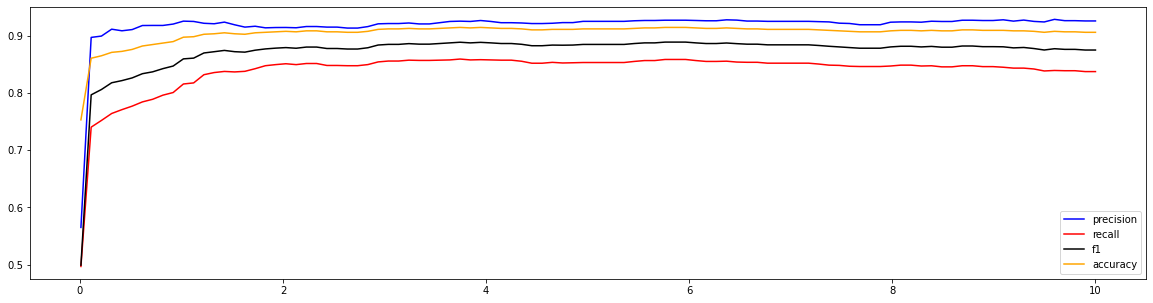

In [19]:
import matplotlib.pyplot as plt
gamma_range = np.linspace(0.01,10,100)
precisionall = []
recallall = []
f1all = []
accuracyall = []
for gamma in gamma_range:
    times = time()
    clf = SVC(kernel = "rbf",gamma=gamma,cache_size = 5000).fit(Xtrain, ytrain)
    pred = clf.predict(Xtest)
    accuracy = clf.score(Xtest,ytest)
    precision = precision_score(ytest, pred, average = "macro")
    recall = recall_score(ytest, pred, average = "macro")
    f1 = f1_score(ytest,pred, average = "macro")
    precisionall.append(precision)
    recallall.append(recall)
    f1all.append(f1)
    accuracyall.append(accuracy)
    print("under gamma %f, testing accuracy is %f,precision is %f,recall is %f',f1 is %f" %(gamma,accuracy,precision,recall,f1))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))
    
print(max(accuracyall),gamma_range[accuracyall.index(max(accuracyall))])
# plt.figure()
plt.figure(figsize=[20,5])
plt.plot(gamma_range,precisionall,c="blue",label="precision")
plt.plot(gamma_range,recallall,c="red",label="recall")
plt.plot(gamma_range,f1all,c="black",label="f1")
plt.plot(gamma_range,accuracyall,c="orange",label="accuracy")
plt.legend()
plt.show()
# acc = 0.9145299145299145, gamma = 3.743636363636363, precision is 0.925463,recall is 0.859246',f1 is 0.888638

# C值

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


under C 0.010000, testing accuracy is 0.664103,precision is 0.221368,recall is 0.333333', f1 is 0.266050
00:01:856932
under C 1.044138, testing accuracy is 0.916239,precision is 0.926479,recall is 0.862304', f1 is 0.890874
00:02:206861
under C 2.078276, testing accuracy is 0.925641,precision is 0.925166,recall is 0.886878', f1 is 0.904693
00:02:295273
under C 3.112414, testing accuracy is 0.933333,precision is 0.932858,recall is 0.899567', f1 is 0.915140
00:02:234744
under C 4.146552, testing accuracy is 0.944444,precision is 0.944381,recall is 0.916923', f1 is 0.929920
00:02:204404
under C 5.180690, testing accuracy is 0.944444,precision is 0.940448,recall is 0.920599', f1 is 0.930094
00:02:359484
under C 6.214828, testing accuracy is 0.943590,precision is 0.938403,recall is 0.918694', f1 is 0.928122
00:02:740913
under C 7.248966, testing accuracy is 0.941880,precision is 0.936448,recall is 0.916360', f1 is 0.925917
00:03:472274
under C 8.283103, testing accuracy is 0.944444,precision

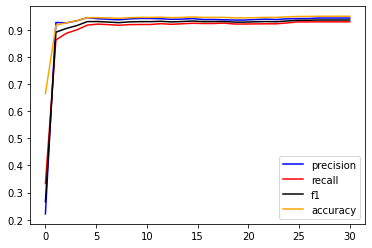

In [20]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,30,30)
precisionall = []
recallall = []
f1all = []
accuracyall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "rbf",gamma=3.743636363636363,C=C,cache_size = 5000).fit(Xtrain, ytrain)
    pred = clf.predict(Xtest)
    accuracy = clf.score(Xtest,ytest)
    precision = precision_score(ytest,pred,average = "macro")
    recall = recall_score(ytest, pred,average = "macro")
    f1 = f1_score(ytest,pred,average = "macro")
    accuracyall.append(accuracy)
    recallall.append(recall)
    precisionall.append(precision)
    f1all.append(f1)
    print("under C %f, testing accuracy is %f,precision is %f,recall is %f', f1 is %f" %(C,accuracy,precision,recall,f1))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))#计算时间
    
print(max(accuracyall),C_range[accuracyall.index(max(accuracyall))])
plt.figure()
plt.plot(C_range,precisionall,c="blue",label="precision")
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,f1all,c="black",label="f1")
plt.plot(C_range,accuracyall,c="orange",label="accuracy")
plt.legend()
plt.show()
#  C = 26.897586206896552

# decision_function_shape = ovo ovr

In [32]:
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for decision_function_shape in ["ovo","ovr"]:
    clf = SVC(kernel = "rbf"
             ,gamma=3.743636363636363
#              ,C=26.897586206896552
             ,cache_size = 5000  #设定越大表示我们算法允许使用越多的内存来进行计算
             ,decision_function_shape = decision_function_shape
             ).fit(Xtrain, ytrain)
    pred = clf.predict(Xtest)  #获取模型的预测结果
    
    accuracy = clf.score(Xtest,ytest)#接口score返回的是准确度accuracy
    precision = precision_score(ytest,pred,average = "macro")
    recall = recall_score(ytest, pred,average = "macro")
    f1 = f1_score(ytest,pred,average = "macro")
    print("%s 's testing accuracy is %f,precision is %f, recall is %f', f1 is %f" %(decision_function_shape,accuracy,precision,recall,f1))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))
    

ovo 's testing accuracy is 0.914530,precision is 0.925463, recall is 0.859246', f1 is 0.888638
00:02:670980
ovr 's testing accuracy is 0.914530,precision is 0.925463, recall is 0.859246', f1 is 0.888638
00:04:616862


# 汇总参数

In [18]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
times = time()
clf = SVC(kernel = "rbf",gamma=3.743636363636363
#           ,C=26.897586206896552
          ,cache_size = 5000,decision_function_shape="ovr"
         ).fit(Xtrain, ytrain)
pred = clf.predict(Xtest)
accuracy = clf.score(Xtest,ytest)
precision = precision_score(ytest,pred,average = "macro")
recall = recall_score(ytest,pred,average = "macro")
f1 = f1_score(ytest,pred,average = "macro")
print("testing accuracy %f,presicion is %f,recall is %f,f1 is %f" % (accuracy,precision,recall,f1))
print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.914530,presicion is 0.925463,recall is 0.859246,f1 is 0.888638
00:01:457701


In [19]:
#kappa系数是用在统计学中评估一致性的一种方法，取值范围是[-1,1]，实际应用中，一般是[0,1]
#与ROC曲线中一般不会出现下凸形曲线的原理类似。这个系数的值越高，则代表模型实现的分类准确度越高。
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(ytest,pred)
kappa

0.8215462332528003

In [20]:
#海明距离也适用于多分类的问题，简单来说就是衡量预测标签与真实标签之间的距离，取值在0~1之间。
#距离为0说明预测结果与真实结果完全相同，距离为1就说明模型与我们想要的结果完全就是背道而驰。
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(ytest,pred)
ham_distance

0.08547008547008547

# 混淆矩阵

In [21]:
# 查看高风险样本占比
valuec = pd.Series(ytest).value_counts()
valuec

1    777
2    218
0    175
Name: risk_level, dtype: int64

In [22]:
valuec[2]/valuec.sum()

0.18632478632478633

In [23]:
clf = SVC(kernel = "rbf"
         ,gamma=3.743636363636363
#          ,C=26.897586206896552
         ,cache_size = 5000
         ).fit(Xtrain, ytrain)

In [24]:
from sklearn.metrics import confusion_matrix
ypred=clf.predict(Xtest)
print(ypred)
# 混淆矩阵，对角线为正确，其他为误分类
confusion_matrix(ytest,ypred,labels=(2,1,0))

[1 0 0 ... 1 1 1]


array([[176,  42,   0],
       [ 16, 754,   7],
       [  0,  35, 140]], dtype=int64)

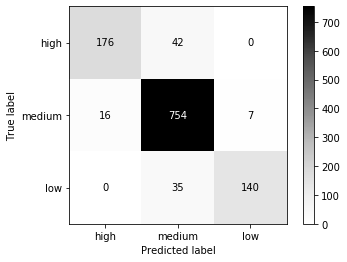

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
# 使用sklearn工具包中的ConfusionMatrixDisplay可视化混淆矩阵，参考plot_confusion_matrix
classes = ('high','medium','low')
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest,ypred,labels=(2,1,0)),display_labels = classes)
disp.plot(
    include_values = True,            # 混淆矩阵每个单元格上显示具体数值
    cmap = plt.get_cmap("Greys"),                 # 不清楚啥意思，没研究，使用的sklearn中的默认值
    ax = None,                        # 同上
    xticks_rotation = "horizontal",   # 同上
    values_format = "d"# 显示的数值格式
)
plt.show()

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
evaluates = ['accuracy','precision','recall','f1']
y_train_pred = clf.predict(Xtrain)
y_test_pred = clf.predict(Xtest)
# accuracy
train_accuracy =clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
# precision
train_precision_macro = precision_score(ytrain, y_train_pred,average="macro")
test_precision_macro = precision_score(ytest, y_test_pred,average="macro")
train_precision_micro = precision_score(ytrain, y_train_pred,average="micro")
test_precision_micro = precision_score(ytest, y_test_pred,average="micro")
# recall
train_recall_macro = recall_score(ytrain, y_train_pred,average="macro")
test_recall_macro = recall_score(ytest, y_test_pred,average="macro")
train_recall_micro = recall_score(ytrain, y_train_pred,average="micro")
test_recall_micro = recall_score(ytest, y_test_pred,average="micro")
# f1
train_f1_macro = f1_score(ytrain, y_train_pred,average="macro")
test_f1_macro = f1_score(ytest, y_test_pred,average="macro")
train_f1_micro = f1_score(ytrain, y_train_pred,average="micro")
test_f1_micro = f1_score(ytest, y_test_pred,average="micro")

print("训练集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_macro,train_recall_macro,train_f1_macro))
print("测试集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro))
print("训练集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_micro,train_recall_micro,train_f1_micro)) 
print("测试集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro))

训练集macro:accuracy is 0.938783,precision is 0.959835,recall is 0.888982,f1 is 0.920320
测试集macro:accuracy is 0.914530,precision is 0.925463,recall is 0.859246,f1 is 0.888638
训练集micro:accuracy is 0.938783,precision is 0.938783,recall is 0.938783,f1 is 0.938783
测试集micro:accuracy is 0.914530,precision is 0.914530,recall is 0.914530,f1 is 0.914530


In [27]:
feature_names = ['TED利差','三个月shibor的实际波动率','银行间市场7日回购利率','期限利差','信用利差','中债综合指数实际波动率','上证工业指数实际波动率','上证商业指数实际波动率','上证工业指数CMAX','上证商业指数CMAX','上证工业指数股票非流动性','上证商业指数股票非流动性','180金融指数实际波动率','180金融指数CMAX','180金融指数股票非流动性','地产指数的实际波动率','地产指数CMAX','地产指数股票非流动性','美元兑人民币汇率波动率','1年期离岸NDF波动率']

In [28]:
cols = ['TED', '3M_shibor', '7D_reporate', 'term_spread', 'credit_spread','SETBI_RealVolatility','INDI_RealVolatility', 'COMI_RealVolatility', 'INDI_CMAX', 'COMI_CMAX','INDI_illiquidity','COMI_illiquidity','180FINI_RealVolatility','180FINI_CMAX','180FINI_illiquidity','REI_RealVolatility','REI_CMAX','REI_illiquidity','USDCNY','1Y_NDF']

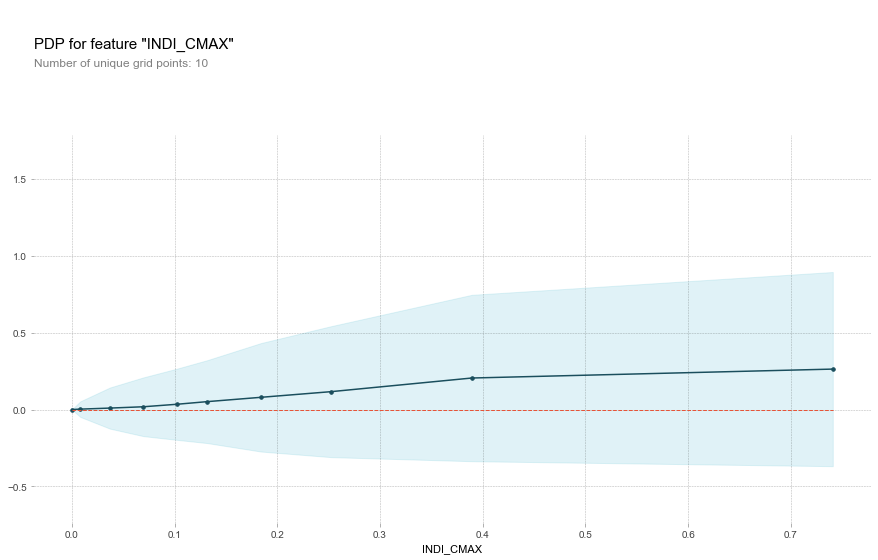

In [31]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
# Create the data that we will plot
pdp_1 = pdp.pdp_isolate(model=clf, dataset=Xtest, model_features=cols, feature='INDI_CMAX')
# plot it
pdp.pdp_plot(pdp_1, 'INDI_CMAX')
plt.show()

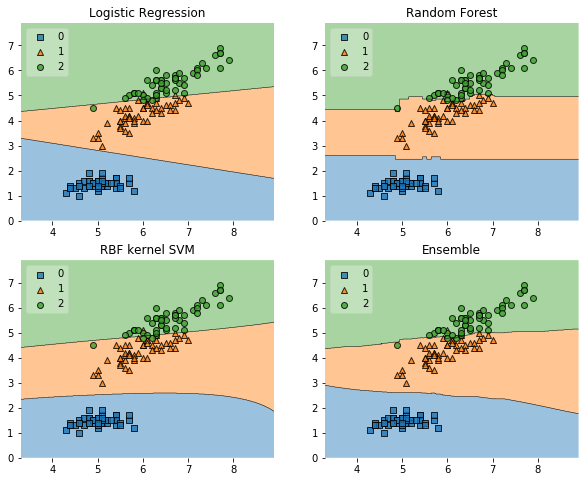

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')
# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]
# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],['Logistic Regression', 'Random Forest','RBF kernel SVM', 'Ensemble'],itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()